### 1: Setting the Environment

In [3]:
#@title 1.1 Mounting google drive
#This part of the code will be commented since now the database is imported from Github
#from google.colab import drive
#drive.mount('/content/drive')

1.1 Mounting Google Drive

**This part of the code will be commented since now the database is imported from Github**

These three lines of code are used to mount Google Drive in Google Colab, which allows you to access files and directories stored in your Google Drive from within the Colab environment. Here's a brief explanation of each line:

1. `from google.colab import drive`: This line imports the `drive` module from the `google.colab` package. This module provides functions to interact with Google Drive.

2. `drive.mount('/content/drive')`: This line calls the `mount` function of the `drive` module and mounts your Google Drive at the specified directory `/content/drive` within the Colab environment. After running this line and following the authentication instructions, you'll be able to access your Google Drive files under this directory.

These lines are commonly used at the beginning of Colab notebooks to set up access to Google Drive for loading and saving files.

In [4]:
#@title 1.2 Setting a folder as working directory
#This part of the code will be commented since now the database is imported from Github
#%cd /content/drive/My Drive/Sentiment Analysis Using LSTM
#!ls

1.2 Setting a folder as a working directory

**This part of the code will be commented since now the database is imported from Github**

The two lines provided are used to navigate to a specific directory within your Google Drive and list its contents. Here's what each line does:

1. `%cd /content/drive/My Drive/Sentiment Analysis Using LSTM`: This line changes the current working directory (`%cd`) to `/content/drive/My Drive/Sentiment Analysis Using LSTM`. It's using a magic command `%cd` to change the directory.

2. `!ls`: This line executes a shell command (`!`) to list (`ls`) the contents of the current directory.

Together, these lines navigate to the specified directory in your Google Drive and list its contents, allowing you to see what files and subdirectories are present there. This is helpful for organizing your work and ensuring you're accessing the correct files.

In [6]:
#@title 1.3 Install Requirements
!pip install tensorflow
!pip install keras
!pip install keras_preprocessing

1.3 Install Requirements

The lines !pip install tensorflow, !pip install keras, and !pip install keras_preprocessing are used to install the required Python packages (tensorflow, keras, and keras_preprocessing, respectively) in your Google Colab environment.

Why do I run this everytime I run the code? it's due to the fact that Google Colab provides a temporary runtime environment. Each time you start a new session or reopen a notebook, the environment is reset, and any previously installed packages are not persisted. Therefore, you need to reinstall the required packages to ensure they are available for use in your current session.

In [7]:
#@title 1.4 Import Environment
import pandas as pd
import numpy as np
import re
import string
import io
import requests

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import tensorflow as tf
from tensorflow.keras import layers, models

from keras.preprocessing.text import one_hot, Tokenizer
from keras.models import Sequential
from keras.utils import pad_sequences
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.text import tokenizer_from_json

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

1.4 Import Environment
- pandas as pd: Used for data manipulation and analysis.
- numpy as np: Provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.
- re: Allows for regular expression operations.
- string: Provides a collection of string constants and helper functions.
- nltk: Natural Language Toolkit library for natural language processing tasks.
- stopwords: A list of common stopwords in various languages.
- PorterStemmer: An algorithm for reducing words to their word stems or roots.
- tensorflow as tf: Machine learning framework for building and training models.
- layers: Module within TensorFlow providing various types of layers for building neural networks.
- one_hot, Tokenizer, Sequential, pad_sequences, Embedding, Conv1D, LSTM: Various modules and classes from Keras for text preprocessing and building neural network models.
- tokenizer_from_json: Utility function for loading a tokenizer from JSON format.
- seaborn as sns: Statistical data visualization library based on matplotlib.
- matplotlib.pyplot as plt: Module providing a MATLAB-like interface for plotting.
- train_test_split: Function for splitting datasets into training and testing subsets.
- confusion_matrix, classification_report: Functions for evaluating model performance.

In [8]:
#@title 1.5 Download Stopwords
nltk.download("stopwords")
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


1.5 Download Stopwords

The purpose of the code snippet `nltk.download("stopwords")` is to download the stopwords corpus from the NLTK (Natural Language Toolkit) library. Stopwords are common words like "the," "is," "and," etc., that are often removed from text data during natural language processing tasks because they typically do not provide much information about the content of the text.

After downloading the stopwords corpus, the code initializes a SnowballStemmer object from NLTK, which is used for stemming. Stemming is the process of reducing words to their root form by removing suffixes and prefixes. This process helps in reducing the dimensionality of the text data and improving the performance of natural language processing tasks.

Finally, the code creates a set called `stopword` containing English stopwords obtained from the NLTK stopwords corpus. This set is then used later in the text preprocessing steps to remove stopwords from text data.

In [9]:
#@title 1.6 Importing the Reddit Comments Dataset
url = "https://github.com/RahulRaviHulli/Sentiment-Analysis-on-Reddit-Comments-and-Posts-for-OSINT-Purposes/raw/main/Project%20Resources/depression_dataset_reddit_cleaned.csv"
download = requests.get(url).content
data = pd.read_csv(io.StringIO(download.decode('utf-8')))

1.6 Importing the Reddit Comments Dataset

The code `data = pd.read_csv("depression_dataset_reddit_cleaned.csv")` reads a CSV file named "depression_dataset_reddit_cleaned.csv" into a pandas DataFrame called `data`. This dataset likely contains cleaned Reddit comments related to depression. By using the `read_csv` function from the pandas library, the data is loaded into memory, allowing for further analysis and processing.

### 2: Exploring the Dataset

In [10]:
#@title 2.1 Dataset Exploration
data.shape
data.head(5)

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


2.1 Dataset Exploration

The code snippet `data.shape` displays the dimensions of the DataFrame `data`, indicating the number of rows and columns in the dataset.

The code `data.head(5)` displays the first five rows of the DataFrame `data`, providing a quick overview of the data's structure and content. This allows users to inspect the data and understand its format before further analysis.

In [11]:
#@title 2.2 Are there any Null Values?
data.isnull().values.any()

False

2.2 Are there any Null Values?

The code `data.isnull().values.any()` checks whether there are any null values present in the DataFrame `data`. If there are any null values, the function will return `True`; otherwise, it will return `False`. This helps in identifying if there are missing values in the dataset that need to be handled before further analysis.

In [12]:
#@title 2.3 Data Shape
data.value_counts().sum()

7731

2.3 Data Shape

The code `data.value_counts().sum()` attempts to count the total number of occurrences of each unique value across all columns in the DataFrame `data`. This operation will not yield the total number of values in the DataFrame but instead counts occurrences separately for each column.

<Axes: xlabel='is_depression', ylabel='count'>

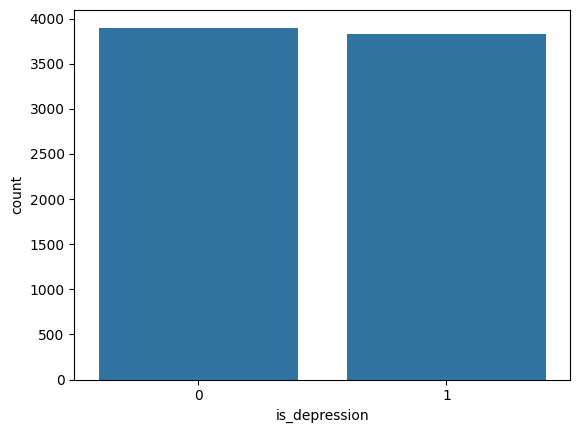

In [13]:
#@title 2.4 Measure Classes
data['is_depression'].value_counts()
sns.countplot(x='is_depression', data=data)

2.4 Measure Classes

The code `data['is_depression'].value_counts()` calculates the frequency of each class label (depression and non-depression) in the 'is_depression' column of the DataFrame `data`. Following this, `sns.countplot(x='is_depression', data=data)` creates a count plot to visualize the distribution of classes, where 'is_depression' is plotted on the x-axis, showing the count of each class.

### 3: Data Preprocessing

In [ ]:
#@title 3.1 What does the comments look like?
data["clean_text"][2]

'anyone else instead of sleeping more when depressed stay up all night to avoid the next day from coming sooner may be the social anxiety in me but life is so much more peaceful when everyone else is asleep and not expecting thing of you'

3.1 What does the comments look like?

This code retrieves the contents of the "clean_text" column for the third row (index 2) of the DataFrame `data`. It displays the text of the comment at index 2.

In [ ]:
#@title 3.2 Preprocessing Function
stopwords = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean(text):
    # Convert the text to lowercase
    text = str(text).lower()

    # Remove square brackets and their contents
    text = re.sub('\[.*?\]', '', text)

    # Remove URLs
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub('<.*?>+', '', text)

    # Remove punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Remove newline characters
    text = re.sub('\n', '', text)

    # Remove alphanumeric characters that contain digits
    text = re.sub('\w*\d\w*', '', text)

    # Apply stemming using Porter Stemmer
    text = ' '.join([stemmer.stem(word) for word in text.split()])  # Rule 9: Apply stemming

    return text

3.2 Preprocessing Function

This code defines a function named `clean` for text preprocessing. It performs the following operations:
1. Converts the text to lowercase.
2. Removes square brackets and their contents using a regular expression.
3. Removes URLs using a regular expression.
4. Removes HTML tags using a regular expression.
5. Removes punctuations using the `string.punctuation` set.
6. Removes newline characters.
7. Removes alphanumeric characters that contain digits.
8. Applies stemming using the Porter Stemmer algorithm to reduce words to their root form.
Finally, it returns the preprocessed text.

In [ ]:
#@title 3.3 Text Preprocessing: Cleaning the Text Data
data["clean_text"] = data["clean_text"].apply(clean)

#Designate x and y
x = data["clean_text"]
y = data["is_depression"]

3.3 Text Preprocessing: Cleaning the Text Data

This code segment applies the `clean` function defined earlier to the "clean_text" column of the dataset `data`. It preprocesses the text data by cleaning it. After preprocessing, it designates the preprocessed text as `x` and the corresponding target variable "is_depression" as `y`. This prepares the data for further processing and model training.

In [ ]:
#@title 3.4 Training and Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

round(sum([len(i.split()) for i in X_train])/len(X_train))

73

3.4 Traing and Test Split

This code segment applies the `clean` function defined earlier to the "clean_text" column of the dataset `data`. It preprocesses the text data by cleaning it. After preprocessing, it designates the preprocessed text as `x` and the corresponding target variable "is_depression" as `y`. This prepares the data for further processing and model training.

### 4: Text Vectorization

In [ ]:
#@title 4.1 Text Vectorization Configuration
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

max_vocab_length = 10000
max_length = 34

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

text_vectorizer.adapt(X_train)

4.1 Text Vectorization Configuration

This code sets up the configuration for text vectorization using TensorFlow's `TextVectorization` layer. It specifies parameters such as `max_tokens` to limit the vocabulary size, `output_mode` to output integer sequences, and `output_sequence_length` to set the maximum length of output sequences. The `adapt` method then adapts the text vectorizer to the training data (`X_train`). This process helps tokenize and vectorize the text data for input into a neural network model.

In [ ]:
#@title 4.2 Valuate top and bottom 5 vocab size
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Vocablary size: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words:: {bottom_5_words}")

Vocablary size: 10000
Top 5 most common words: ['', '[UNK]', 'i', 'to', 'and']
Bottom 5 least common words:: ['jordynhil', 'jordi', 'jordar', 'jordan', 'jonpaulkais']


4.2 Valuate top and bottom 5 vocab size

This code snippet evaluates and prints the top 5 most common words and the bottom 5 least common words in the vocabulary generated by the `TextVectorization` layer. It first retrieves the vocabulary using the `get_vocabulary()` method. Then, it slices the vocabulary list to obtain the top 5 and bottom 5 words. Finally, it prints the total vocabulary size along with the top and bottom words.

### 5: Create Embedding Layer

In [ ]:
#@title 5.1 Standard Embedding Layer Configuration
embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length
                             )

5.1 Standard Embedding Layer Configuration

This code defines an embedding layer configuration using the `Embedding` class from Keras. Here's what each parameter signifies:

- `input_dim`: The size of the vocabulary, which is the maximum number of tokens that can be represented by the embedding layer.
- `output_dim`: The dimensionality of the embedding space. It determines the size of the vector representation for each token.
- `embeddings_initializer`: The initialization strategy for the embedding weights. In this case, it's set to "uniform", meaning the weights are initialized using a uniform distribution.
- `input_length`: The length of input sequences that will be fed into the embedding layer. This parameter is required if you plan to connect a Flatten or Dense layer downstream, but it's not necessary for LSTM or Conv1D layers.

Overall, this configuration sets up an embedding layer suitable for tokenizing text data with a vocabulary size of `max_vocab_length`, producing dense embeddings of dimensionality 128, and input sequences of length `max_length`.

In [ ]:
#@title 5.2 Model Definition: Dense Architecture
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

5.2 Model Definition: Dense Architecture

This code defines a dense neural network architecture for text classification. Here's a breakdown of what each part does:

- `inputs`: Defines the input layer for the model, specifying the shape and data type of the input data. In this case, it expects input sequences of strings.
- `text_vectorizer(inputs)`: This is the text vectorization layer previously configured. It converts raw text inputs into sequences of integers.
- `embedding(x)`: This line applies the embedding layer to the integer sequences obtained from the text vectorization. It converts the integer-encoded tokens into dense vectors of fixed size.
- `layers.GlobalAveragePooling1D()`: This layer performs global average pooling over the sequence dimension. It reduces the dimensionality of the input by taking the average of all values across the sequence dimension.
- `layers.Dense(1, activation="sigmoid")`: This is the output layer of the model. It consists of a single neuron with a sigmoid activation function, which is commonly used for binary classification tasks.
- `model_1`: This line constructs the Keras `Model` object, specifying the inputs and outputs of the model. The model is named "model_1_dense".

Overall, this architecture takes string inputs, converts them to integer sequences, applies an embedding layer to obtain dense representations, performs global average pooling to reduce dimensionality, and finally, passes the result through a dense layer with a sigmoid activation function for binary classification.

In [ ]:
#@title 5.3 Model Compilation
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

5.3 Model Compilation

This code compiles the defined model (`model_1`) with the specified loss function, optimizer, and evaluation metrics. Here's what each argument does:

- `loss='binary_crossentropy'`: This specifies the loss function to use during training. Binary crossentropy is commonly used for binary classification problems like this one.
  
- `optimizer='adam'`: This specifies the optimizer to use for training the model. Adam is a popular choice due to its adaptive learning rate properties and efficiency in training neural networks.

- `metrics=['accuracy']`: This specifies the evaluation metric(s) to monitor during training and testing. In this case, it uses accuracy, which measures the proportion of correct predictions made by the model.

With this compilation step, the model is configured for training with the specified loss function, optimizer, and evaluation metric.

In [ ]:
#@title 5.4 General Model Training
model_1.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5)

Epoch 1/5
194/194 [==============================] - 5s 21ms/step - loss: 0.4670 - accuracy: 0.8635 - val_loss: 0.3624 - val_accuracy: 0.8591
Epoch 2/5
194/194 [==============================] - 4s 20ms/step - loss: 0.3215 - accuracy: 0.8765 - val_loss: 0.3014 - val_accuracy: 0.8895
Epoch 3/5
194/194 [==============================] - 5s 25ms/step - loss: 0.2489 - accuracy: 0.9120 - val_loss: 0.2404 - val_accuracy: 0.9160
Epoch 4/5
194/194 [==============================] - 4s 19ms/step - loss: 0.1867 - accuracy: 0.9386 - val_loss: 0.2005 - val_accuracy: 0.9257
Epoch 5/5
194/194 [==============================] - 4s 19ms/step - loss: 0.1431 - accuracy: 0.9549 - val_loss: 0.1760 - val_accuracy: 0.9315


5.4 General Model Training

This code trains the compiled model (`model_1`) using the training data `(X_train, Y_train)` and validates it on the validation data `(X_test, Y_test)`. Here's what each argument does:

- `X_train`, `Y_train`: These are the input features and corresponding target labels for training the model.
  
- `validation_data=(X_test, Y_test)`: This specifies the validation data to evaluate the model's performance after each epoch. It helps monitor whether the model is overfitting or generalizing well to unseen data.

- `epochs=5`: This parameter determines the number of training epochs, i.e., the number of times the model will be trained on the entire training dataset. One epoch is a single forward and backward pass of all the training examples.

During training, the model's weights are adjusted iteratively to minimize the specified loss function (binary crossentropy in this case) using the optimizer (Adam) based on the training data. The validation data is used to monitor the model's performance on unseen data and prevent overfitting.

In [ ]:
#@title 5.5 General Classification
Y_pred=model_1.predict(X_test)
Y_pred=(Y_pred>=0.5).astype("int")

49/49 [==============================] - 0s 3ms/step


5.5 General Classification

The provided code is for making predictions using a trained model (`model_1`) on the test data (`X_test`). It then converts the predicted probabilities into binary predictions by thresholding at 0.5, assigning values of 1 for probabilities greater than or equal to 0.5 and 0 otherwise.

Here's a breakdown of the code:

1. `Y_pred = model_1.predict(X_test)`: This line uses the trained model `model_1` to predict the labels for the test data `X_test`.

2. `Y_pred = (Y_pred >= 0.5).astype("int")`: This line converts the predicted probabilities (`Y_pred`) into binary predictions. It assigns 1 to elements where the predicted probability is greater than or equal to 0.5, and 0 otherwise.

3. The final line is not explicitly shown but it's implied that `Y_pred` contains the binary predictions for the test data, which can then be used for evaluation or further analysis.

In [ ]:
#@title 5.6 Accuracy, Macro Average, Weighted Average
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       778
           1       0.96      0.91      0.93       769

    accuracy                           0.94      1547
   macro avg       0.94      0.94      0.94      1547
weighted avg       0.94      0.94      0.94      1547



5.6 Accuracy, Macro Average, Weighted Average

The provided code calculates and prints a classification report, including metrics such as accuracy, macro average, and weighted average, based on the true labels (`Y_test`) and the predicted labels (`Y_pred`). This report provides a comprehensive overview of the model's performance across different classes.

Here's what each line does:

1. `print(classification_report(Y_test, Y_pred))`: This line generates a classification report using the true labels (`Y_test`) and the predicted labels (`Y_pred`). The report includes metrics such as precision, recall, F1-score, and support for each class, as well as overall accuracy, macro average, and weighted average.

The classification report provides valuable insights into the model's performance, helping to assess its effectiveness in classifying instances from each class and overall.

In [ ]:
#@title 5.7 Using Logistic Regression for Classification
# Define the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Adjust max_features as needed

# Define the Logistic Regression classifier
logistic_regression = LogisticRegression()

# Create a pipeline combining TF-IDF vectorization and Logistic Regression
pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', logistic_regression)
])

# Train the model
pipeline.fit(X_train, Y_train)

# Predictions
Y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.9618616677440207

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       778
           1       0.97      0.96      0.96       769

    accuracy                           0.96      1547
   macro avg       0.96      0.96      0.96      1547
weighted avg       0.96      0.96      0.96      1547



5.7 Using Logistic Regression for Classification

1. **TF-IDF Vectorizer Definition**: It initializes a TF-IDF vectorizer (`TfidfVectorizer`) with a specified maximum number of features (`max_features`). This vectorizer converts text data into numerical features based on the TF-IDF (Term Frequency-Inverse Document Frequency) representation.

2. **Logistic Regression Classifier Definition**: It initializes a logistic regression classifier (`LogisticRegression`). This classifier will be used for binary classification tasks.

3. **Pipeline Creation**: It creates a pipeline using the `Pipeline` class from scikit-learn. The pipeline consists of two steps: TF-IDF vectorization (`'tfidf'`) and logistic regression classification (`'clf'`). This pipeline allows for the seamless application of both preprocessing (vectorization) and classification.

4. **Model Training**: It trains the pipeline on the training data (`X_train`, `Y_train`) using the `fit` method.

5. **Predictions**: It makes predictions on the test data (`X_test`) using the trained pipeline and stores the predictions in `Y_pred`.

6. **Model Evaluation**: It evaluates the model's performance by calculating and printing the accuracy score and the classification report using `accuracy_score` and `classification_report` functions, respectively. The classification report provides metrics such as precision, recall, F1-score, and support for each class, as well as overall accuracy.

### 6: LSTM Library

In [ ]:
#@title 6.1 LSTM

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64, activation="tanh")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_lstm")

6.1 LSTM

The code defines an LSTM (Long Short-Term Memory) neural network model for text classification using TensorFlow Keras. It starts by defining the input layer to accept string inputs. The text data is then vectorized using a pre-trained text vectorizer and embedded into dense representations. An LSTM layer with 64 units and a hyperbolic tangent activation function processes the embedded data. Finally, a dense output layer with a sigmoid activation function produces binary classification predictions. This model architecture enables capturing long-range dependencies in sequential data like text, making it suitable for tasks such as sentiment analysis or text classification.

In [ ]:
#@title 6.2 Model Compilation
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

6.2 Model Compilation

The code compiles the previously defined LSTM model (`model_2`) using binary cross-entropy as the loss function, the Adam optimizer, and accuracy as the evaluation metric. This compilation step configures the training process by specifying how the model should learn from the provided data and how its performance should be measured during training.

In [ ]:
#@title 6.3 Model Training
# Train the LSTM model on the training data, validating on the test data
history_model_2 = model_2.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5)

Epoch 1/5
194/194 [==============================] - 16s 68ms/step - loss: 0.1292 - accuracy: 0.9601 - val_loss: 0.1495 - val_accuracy: 0.9451
Epoch 2/5
194/194 [==============================] - 10s 49ms/step - loss: 0.0616 - accuracy: 0.9816 - val_loss: 0.1625 - val_accuracy: 0.9522
Epoch 3/5
194/194 [==============================] - 9s 47ms/step - loss: 0.0444 - accuracy: 0.9854 - val_loss: 0.1421 - val_accuracy: 0.9535
Epoch 4/5
194/194 [==============================] - 9s 44ms/step - loss: 0.0315 - accuracy: 0.9913 - val_loss: 0.2117 - val_accuracy: 0.9463
Epoch 5/5
194/194 [==============================] - 10s 51ms/step - loss: 0.0447 - accuracy: 0.9877 - val_loss: 0.2324 - val_accuracy: 0.9425


6.3 Model Training

This code trains the LSTM model (`model_2`) on the training data (`X_train` and `Y_train`) for 5 epochs while validating its performance on the test data (`X_test` and `Y_test`). The training process involves adjusting the model's weights based on the optimization algorithm and the specified loss function, with validation data used to monitor the model's performance on unseen examples during training. The `history_model_2` object stores the training history, including metrics such as loss and accuracy, for later analysis or visualization.

In [ ]:
#@title 6.4 Model Prediction
# Predict using the trained model on the test data
Y_pred = model_2.predict(X_test)

# Convert predicted probabilities to binary predictions
Y_pred = (Y_pred >= 0.5).astype("int")

# Print classification report to evaluate the model performance
print(classification_report(Y_test, Y_pred))

49/49 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       789
           1       0.93      0.96      0.94       758

    accuracy                           0.94      1547
   macro avg       0.94      0.94      0.94      1547
weighted avg       0.94      0.94      0.94      1547



6.4 Model Prediction

The trained model (model_2) is used to make predictions on the test data (X_test). The predicted probabilities for each instance in the test data are obtained using the predict method. These probabilities are then converted into binary predictions by thresholding at 0.5, classifying instances as either positive or negative based on whether their predicted probability is greater than or equal to 0.5. Finally, a classification report is generated to evaluate the model's performance on the test data, providing metrics such as precision, recall, and F1-score for each class, as well as overall accuracy. This allows for a comprehensive assessment of the model's predictive capabilities.

In [ ]:
#@title 6.5 Classification
Y_pred=model_2.predict(X_test)
Y_pred=(Y_pred>=0.5).astype("int")

49/49 [==============================] - 1s 13ms/step


6.5 Classification

This code performs classification using the trained LSTM model (`model_2`) on the test data (`X_test`). It generates predictions (`Y_pred`) by applying the model to the test data and then converts the predicted probabilities to binary labels by thresholding at 0.5, classifying instances as positive if the predicted probability is greater than or equal to 0.5, and negative otherwise.

In [ ]:
#@title 6.6 Accuracy, Macro Average, Weighted Average
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       789
           1       0.93      0.96      0.94       758

    accuracy                           0.94      1547
   macro avg       0.94      0.94      0.94      1547
weighted avg       0.94      0.94      0.94      1547



6.6 Accuracy, Macro Average, Weighted Average

This code calculates and prints various classification metrics such as accuracy, macro average, and weighted average based on the ground truth labels (`Y_test`) and the predicted labels (`Y_pred`). The `classification_report` function from scikit-learn generates a detailed report containing precision, recall, F1-score, and support for each class, along with macro and weighted averages of these metrics across all classes.

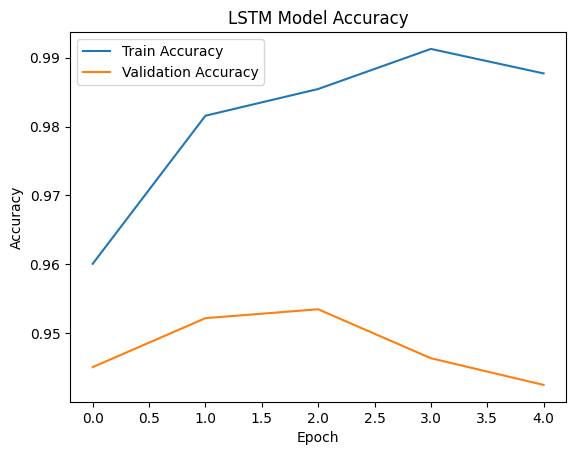

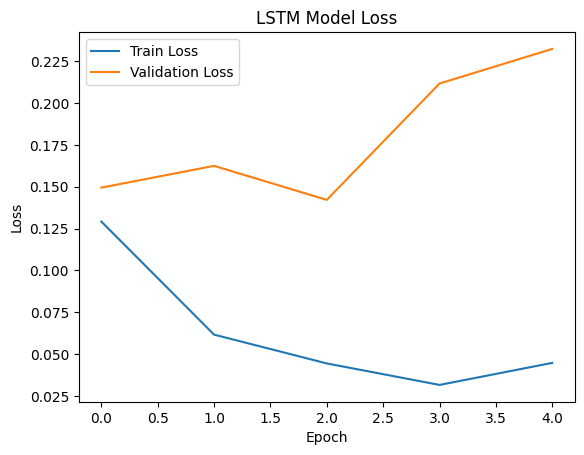

In [ ]:
#@title 6.7 Plot training history
# Plotting model accuracy
plt.plot(history_model_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_model_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting model loss
plt.plot(history_model_2.history['loss'], label='Train Loss')
plt.plot(history_model_2.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

6.7 Plot training history

This code plots the training history of an LSTM model by displaying the changes in accuracy and loss over epochs. The first plot shows the training and validation accuracy over epochs, while the second plot shows the training and validation loss over epochs. These visualizations help in understanding the performance and convergence of the model during training.

###7: GRU Library

In [ ]:
#@title 7.1 GRU
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64, activation="tanh")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_gru = models.Model(inputs, outputs, name="model_gru")

7.1 GRU Model Definition

The code defines a GRU (Gated Recurrent Unit) neural network model for text classification.
It starts with an input layer accepting string inputs.
The inputs are then vectorized using a text vectorizer and embedded into dense representations.
A GRU layer with 64 units and hyperbolic tangent activation function processes the embedded inputs.
Finally, a Dense layer with sigmoid activation produces binary classification outputs.

In [ ]:
#@title 7.2 Model Compilation
# Compile the model with binary cross-entropy loss and Adam optimizer
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

7.2 Model Compilation

The code compiles the GRU model using binary cross-entropy loss and the Adam optimizer.
Binary cross-entropy is suitable for binary classification tasks, while the Adam optimizer efficiently updates the model's weights during training. Accuracy is chosen as the metric to evaluate the model's performance.

In [ ]:
#@title 7.3 Model Training
# Train the GRU model on the training data, validating on the test data
history_gru = model_gru.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5)

Epoch 1/5
194/194 [==============================] - 12s 50ms/step - loss: 0.1432 - accuracy: 0.9486 - val_loss: 0.2182 - val_accuracy: 0.9263
Epoch 2/5
194/194 [==============================] - 8s 41ms/step - loss: 0.0390 - accuracy: 0.9892 - val_loss: 0.1714 - val_accuracy: 0.9425
Epoch 3/5
194/194 [==============================] - 9s 48ms/step - loss: 0.0238 - accuracy: 0.9945 - val_loss: 0.2035 - val_accuracy: 0.9418
Epoch 4/5
194/194 [==============================] - 9s 46ms/step - loss: 0.0223 - accuracy: 0.9947 - val_loss: 0.2130 - val_accuracy: 0.9315
Epoch 5/5
194/194 [==============================] - 8s 41ms/step - loss: 0.0127 - accuracy: 0.9969 - val_loss: 0.2269 - val_accuracy: 0.9431


7.3 Model Training:

This section involves training the GRU model on the training dataset while validating its performance on the test dataset over 5 epochs. The training history is stored for further analysis. This code snippet trains the GRU model using the training data (X_train and Y_train) and validates it on the test data (X_test and Y_test) for 5 epochs. The training history is stored in the variable history_gru.

In [ ]:
#@title 7.4 Model Accuracy, Macro Average, Weighted Average
# Predict using the trained model on the test data
Y_pred = model_gru.predict(X_test)

# Convert predicted probabilities to binary predictions
Y_pred = (Y_pred >= 0.5).astype("int")

# Print classification report to evaluate the model performance
print(classification_report(Y_test, Y_pred))

49/49 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       789
           1       0.95      0.93      0.94       758

    accuracy                           0.94      1547
   macro avg       0.94      0.94      0.94      1547
weighted avg       0.94      0.94      0.94      1547



7.4 Model Accuracy, Macro Average, Weighted Average:

In this step, the trained GRU model is utilized to make predictions on the test dataset. The model predicts the probabilities of the samples belonging to the positive class (1). These probabilities are then converted into binary predictions by considering a threshold of 0.5. Finally, the classification report is printed to assess the performance of the model based on its predictions compared to the ground truth labels.

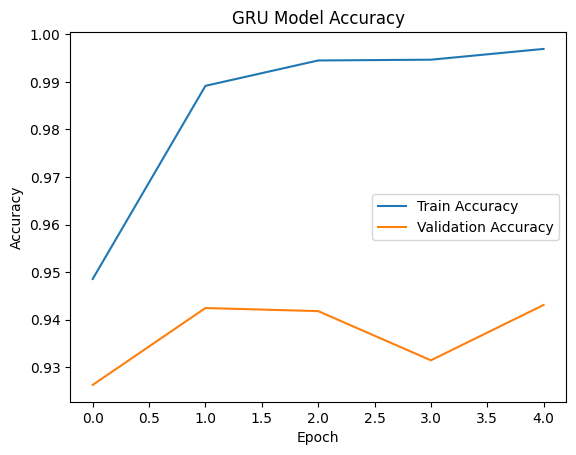

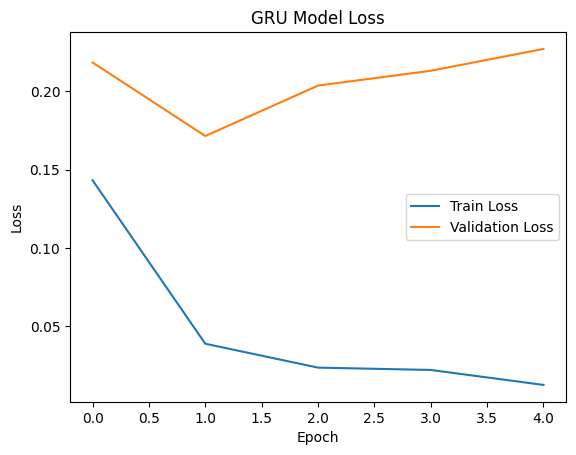

In [ ]:
#@title 7.5 Plot training
# Plotting model accuracy
plt.plot(history_gru.history['accuracy'], label='Train Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='Validation Accuracy')
plt.title('GRU Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting model loss
plt.plot(history_gru.history['loss'], label='Train Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('GRU Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

7.5 Plot Training:

This section presents visualizations of the training progress of the GRU model. Two plots are generated: one illustrating the model accuracy on both the training and validation datasets across different epochs, and the other showing the corresponding loss values. These plots help in understanding how the model's performance evolves during the training process and whether it is overfitting or underfitting.

###8: Custom LSTM Function

In [ ]:
#@title 8.1 Define CustomLSTM layer
class CustomLSTM(tf.keras.layers.Layer):
    def __init__(self, units, return_sequences=False):
        super(CustomLSTM, self).__init__()
        self.units = units
        self.return_sequences = return_sequences

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.Wf = self.add_weight(shape=(input_dim, self.units), initializer='uniform', name='Wf')
        self.Uf = self.add_weight(shape=(self.units, self.units), initializer='uniform', name='Uf')
        self.bf = self.add_weight(shape=(self.units,), initializer='zeros', name='bf')

        self.Wi = self.add_weight(shape=(input_dim, self.units), initializer='uniform', name='Wi')
        self.Ui = self.add_weight(shape=(self.units, self.units), initializer='uniform', name='Ui')
        self.bi = self.add_weight(shape=(self.units,), initializer='zeros', name='bi')

        self.Wc = self.add_weight(shape=(input_dim, self.units), initializer='uniform', name='Wc')
        self.Uc = self.add_weight(shape=(self.units, self.units), initializer='uniform', name='Uc')
        self.bc = self.add_weight(shape=(self.units,), initializer='zeros', name='bc')

        self.Wo = self.add_weight(shape=(input_dim, self.units), initializer='uniform', name='Wo')
        self.Uo = self.add_weight(shape=(self.units, self.units), initializer='uniform', name='Uo')
        self.bo = self.add_weight(shape=(self.units,), initializer='zeros', name='bo')

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        time_steps = tf.shape(inputs)[1]
        hidden_states = tf.zeros(shape=(batch_size, self.units))
        cell_states = tf.zeros(shape=(batch_size, self.units))
        outputs = []

        for t in range(time_steps):
            x_t = inputs[:, t, :]

            # Forget Gate
            f_t = tf.sigmoid(tf.matmul(x_t, self.Wf) + tf.matmul(hidden_states, self.Uf) + self.bf)

            # Input Gate
            i_t = tf.sigmoid(tf.matmul(x_t, self.Wi) + tf.matmul(hidden_states, self.Ui) + self.bi)

            # Candidate Cell State
            c_tilda_t = tf.tanh(tf.matmul(x_t, self.Wc) + tf.matmul(hidden_states, self.Uc) + self.bc)

            # Update Cell State
            cell_states = f_t * cell_states + i_t * c_tilda_t

            # Output Gate
            o_t = tf.sigmoid(tf.matmul(x_t, self.Wo) + tf.matmul(hidden_states, self.Uo) + self.bo)

            # Hidden State
            hidden_states = o_t * tf.tanh(cell_states)

            outputs.append(hidden_states)

        if self.return_sequences:
            return tf.stack(outputs, axis=1)
        else:
            return hidden_states

8.1 Define Custom LSTM

The `CustomLSTM` class defines a custom implementation of the Long Short-Term Memory (LSTM) layer in TensorFlow/Keras. Here's what's happening in the code:

1. **Initialization**: The constructor (`__init__` method) initializes the LSTM layer with the specified number of units and whether to return sequences for each time step.

2. **Building the Layer**: The `build` method initializes the weights and biases for the LSTM gates (`Forget Gate`, `Input Gate`, `Candidate Cell State`, and `Output Gate`). These weights and biases are trainable parameters learned during training.

3. **Forward Pass**: The `call` method performs the forward pass of the LSTM layer. It iterates over each time step in the input sequence, computes the LSTM gates and cell state updates, and computes the hidden state output.

4. **LSTM Gates**: The LSTM gates (`Forget Gate`, `Input Gate`, and `Output Gate`) control the flow of information through the cell state. They are computed using the input at the current time step (`x_t`), the previous hidden state (`hidden_states`), and the learned weights (`Wf`, `Wi`, `Wo`) and biases (`bf`, `bi`, `bo`).

5. **Cell State Update**: The cell state (`cell_states`) is updated based on the forget gate (`f_t`), input gate (`i_t`), and candidate cell state (`c_tilda_t`). This helps the LSTM layer to remember or forget information over time.

6. **Hidden State Calculation**: The hidden state (`hidden_states`) is computed using the output gate (`o_t`) and the updated cell state. This is the output of the LSTM layer.

7. **Return Sequences**: If `return_sequences` is set to `True`, the method returns the hidden states for each time step. Otherwise, it returns only the hidden state for the last time step.

This custom LSTM layer provides a flexible and customizable implementation of the LSTM architecture, allowing for experimentation with different configurations and adaptations to specific use cases.

In [ ]:
#@title 8.2 Model Definition and Compilation

#Model Definition
inputs = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32)
x = embedding(inputs)
x = CustomLSTM(64, return_sequences=False)(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_custom_lstm = tf.keras.Model(inputs, outputs)

# Model Compilation
model_custom_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

8.2 Model Definition and Compilation

Model Definition:

We define the input layer with the shape of (max_length,) using tf.keras.layers.Input.
The input data is passed through the embedding layer (embedding) to convert numerical indices into dense vectors.
The embedded sequences are then passed through the custom LSTM layer (CustomLSTM) with 64 units and return_sequences=False, indicating that only the final hidden state is returned.
Finally, a dense layer with a sigmoid activation function is added to produce the output predictions.
The model is instantiated using tf.keras.Model, with the input and output layers specified.
Model Compilation:

We compile the model using model.compile, specifying 'binary_crossentropy' as the loss function for binary classification.
The Adam optimizer is used for optimization, and we include 'accuracy' as a metric to monitor during training.

In [ ]:
#@title 8.3 Preprocess and tokenize the input data
X_train_tokenized = text_vectorizer(X_train)
X_test_tokenized = text_vectorizer(X_test)

# Model Training
history = model_custom_lstm.fit(X_train_tokenized, Y_train, validation_data=(X_test_tokenized, Y_test), epochs=5)

Epoch 1/5
194/194 [==============================] - 15s 64ms/step - loss: 0.1870 - accuracy: 0.9474 - val_loss: 0.1961 - val_accuracy: 0.9483
Epoch 2/5
194/194 [==============================] - 12s 63ms/step - loss: 0.0508 - accuracy: 0.9905 - val_loss: 0.2360 - val_accuracy: 0.9438
Epoch 3/5
194/194 [==============================] - 12s 62ms/step - loss: 0.0400 - accuracy: 0.9926 - val_loss: 0.3315 - val_accuracy: 0.9173
Epoch 4/5
194/194 [==============================] - 11s 58ms/step - loss: 0.0602 - accuracy: 0.9887 - val_loss: 0.2879 - val_accuracy: 0.9360
Epoch 5/5
194/194 [==============================] - 12s 59ms/step - loss: 0.1239 - accuracy: 0.9762 - val_loss: 0.4017 - val_accuracy: 0.8474


8.3 Preprocess and tokenize the input data

Tokenization:
We tokenize the training and test data using the text_vectorizer function. This function converts text data into numerical sequences suitable for input into the model.
Model Training:

We train the custom LSTM model (model_custom_lstm) using the tokenized training data (X_train_tokenized) and corresponding labels (Y_train).
During training, we validate the model's performance on the tokenized test data (X_test_tokenized) and corresponding labels (Y_test).
Training is conducted over 5 epochs, during which the model learns to map tokenized sequences to their corresponding labels.

-------------------------------------------------------------------------------
Difference between Tokenization and Vectorization

Tokenization is the process of breaking down text into smaller units called tokens. These tokens can be words, subwords, or characters, depending on the tokenization strategy used.
The goal of tokenization is to split text into meaningful units that can be processed by a machine learning model.
For example, the sentence "The cat sat on the mat" might be tokenized into individual words: ["The", "cat", "sat", "on", "the", "mat"].
Vectorization:

Vectorization is the process of converting tokens or text data into numerical vectors, which can be understood and processed by machine learning algorithms.
Each token or word is represented by a vector of numerical values, where each dimension of the vector corresponds to a feature or aspect of the token.
Vectorization techniques include one-hot encoding, count vectorization, TF-IDF (Term Frequency-Inverse Document Frequency), and word embeddings (such as Word2Vec, GloVe, or FastText).
The goal of vectorization is to transform text data into a format that can be fed into machine learning models for training and prediction.

In [ ]:
#@title 8.4 Live Prediction
def predict_depression(model, text_vectorizer):
    text = input("Enter a text: ")
    text = clean(text)  # Assuming you have defined the clean function as in your code
    text = [text]
    text_sequence = text_vectorizer(text)
    prediction = model.predict(text_sequence)
    if prediction >= 0.5:
        print("The input text represents depression.")
    else:
        print("The input text does not represent depression.")

# Perform live prediction
predict_depression(model_custom_lstm, text_vectorizer)

# Generate predictions
Y_pred = model_custom_lstm.predict(X_test_tokenized)
y_pred_labels = [1 if pred >= 0.5 else 0 for pred in Y_pred]

Enter a text: I am bad
1/1 [==============================] - 0s 25ms/step
The input text represents depression.
49/49 [==============================] - 0s 9ms/step


8.4 Live Prediction

Function Definition (predict_depression):

The function takes two arguments: model (the trained model) and text_vectorizer (a function for vectorizing input text).
Inside the function, the user is prompted to enter a text input.
The entered text is then passed through a cleaning function (clean) to preprocess it, assuming such a function has been defined elsewhere.
The cleaned text is then converted into a list and passed through the text_vectorizer function to convert it into a numerical vector suitable for input to the model.
The model then predicts the class probability of the input text being associated with depression.
If the predicted probability is greater than or equal to 0.5, the function prints "The input text represents depression." Otherwise, it prints "The input text does not represent depression."
Live Prediction:

The predict_depression function is called with the trained model_custom_lstm and text_vectorizer function as arguments to perform live predictions based on user input.
Generating Predictions:

After performing live predictions, the same model (model_custom_lstm) is used to generate predictions on the test data (X_test_tokenized). These predictions are then converted into binary labels based on a threshold of 0.5, where any prediction greater than or equal to 0.5 is classified as 1 (representing depression), and anything below 0.5 is classified as 0 (not representing depression).

In [ ]:
#@title 8.5 Generate and Print classification report
report = classification_report(Y_test, y_pred_labels)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.75      0.83       789
           1       0.78      0.95      0.86       758

    accuracy                           0.85      1547
   macro avg       0.86      0.85      0.85      1547
weighted avg       0.86      0.85      0.85      1547



8.5 Generate and Print Classification Report

The classification_report function is called with two arguments: Y_test (the actual labels of the test dataset) and y_pred_labels (the predicted labels generated by the model).
This function computes various metrics such as precision, recall, F1-score, and support for each class (in this case, binary classes: depression and non-depression).
The classification report summarizes these metrics for each class and also provides macro and weighted averages across all classes.
Print Classification Report:

The generated classification report is stored in the variable report.
The classification report is printed to the console using the print function, preceded by a header "Classification Report:".
The printed report provides insights into the performance of the model across different metrics and classes, aiding in the evaluation of its performance.

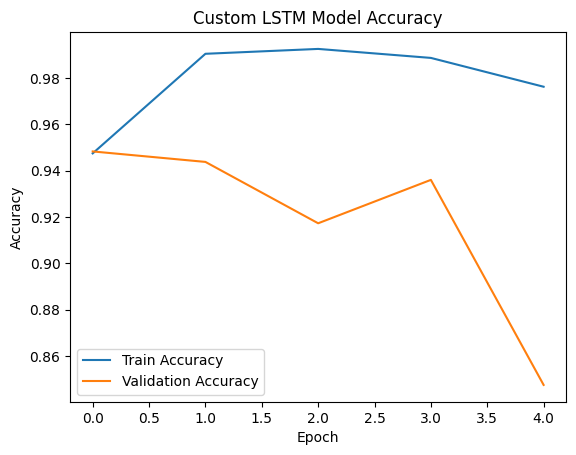

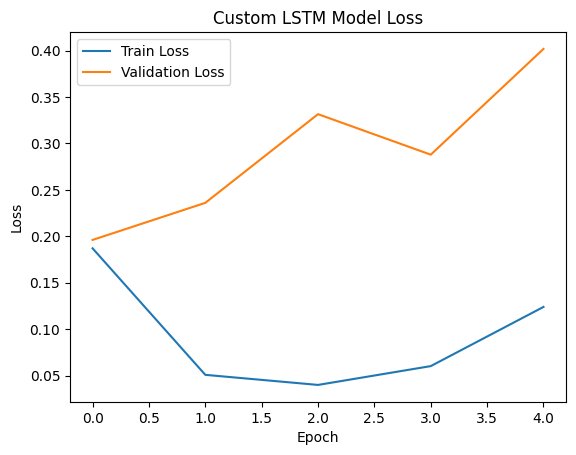

In [ ]:
#@title 8.6 Plotting training
# Plotting model accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Custom LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting model loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Custom LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


8.6 Plot Training

Plotting Model Accuracy:

The plt.plot() function is used to plot two lines: one for training accuracy (history.history['accuracy']) and another for validation accuracy (history.history['val_accuracy']).
The label parameter is set for each line to differentiate between training and validation accuracy.
Title, xlabel, ylabel, and legend are added to the plot for clarity.
Finally, plt.show() is called to display the plot.
Plotting Model Loss:

Similar to accuracy plotting, the plt.plot() function is used to plot training loss (history.history['loss']) and validation loss (history.history['val_loss']).
Labels, title, xlabel, ylabel, and legend are added as before.
The plot is displayed using plt.show().
These plots are essential for visualizing the training progress of the custom LSTM model. They help in understanding how the model's accuracy and loss evolve over epochs, providing insights into its performance and potential areas for improvement.

###9: Custom GRU Function

In [ ]:
#@title 9.1 Define Custom GRU layer
class CustomGRU(tf.keras.layers.Layer):
    def __init__(self, units, return_sequences=False):
        super(CustomGRU, self).__init__()
        self.units = units
        self.return_sequences = return_sequences

    def build(self, input_shape):
        input_dim = input_shape[-1]

        self.Wz = self.add_weight(shape=(input_dim, self.units), initializer='uniform', name='Wz')
        self.Uz = self.add_weight(shape=(self.units, self.units), initializer='uniform', name='Uz')
        self.bz = self.add_weight(shape=(self.units,), initializer='zeros', name='bz')

        self.Wr = self.add_weight(shape=(input_dim, self.units), initializer='uniform', name='Wr')
        self.Ur = self.add_weight(shape=(self.units, self.units), initializer='uniform', name='Ur')
        self.br = self.add_weight(shape=(self.units,), initializer='zeros', name='br')

        self.W = self.add_weight(shape=(input_dim, self.units), initializer='uniform', name='W')
        self.U = self.add_weight(shape=(self.units, self.units), initializer='uniform', name='U')
        self.b = self.add_weight(shape=(self.units,), initializer='zeros', name='b')

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        time_steps = tf.shape(inputs)[1]
        hidden_states = tf.zeros(shape=(batch_size, self.units))
        outputs = []

        for t in range(time_steps):
            x_t = inputs[:, t, :]

            # Update Gate (z)
            z_t = tf.sigmoid(tf.matmul(x_t, self.Wz) + tf.matmul(hidden_states, self.Uz) + self.bz)

            # Reset Gate (r)
            r_t = tf.sigmoid(tf.matmul(x_t, self.Wr) + tf.matmul(hidden_states, self.Ur) + self.br)

            # Candidate Hidden State (h_tilda)
            h_tilda_t = tf.tanh(tf.matmul(x_t, self.W) + tf.matmul(r_t * hidden_states, self.U) + self.b)

            # Hidden State Update
            hidden_states = (1 - z_t) * hidden_states + z_t * h_tilda_t

            outputs.append(hidden_states)

        if self.return_sequences:
            return tf.stack(outputs, axis=1)
        else:
            return hidden_states


9.1 Define Custom GRU Layer

Initialization:

The __init__ method initializes the custom GRU layer with the specified number of units and whether it should return sequences for each time step.
Build Method:

In the build method, weights for the update gate (z), reset gate (r), and candidate hidden state are initialized.
Weights are created using add_weight with appropriate shapes and initializers.
Call Method:

The call method defines the forward pass of the custom GRU layer.
For each time step, the input is processed through the update gate (z), reset gate (r), and candidate hidden state (h_tilda).
The hidden state is updated based on the update gate and the candidate hidden state using the GRU update equations.
The updated hidden states are stored in a list for each time step.
Finally, if return_sequences is True, the list of hidden states is stacked along the time step axis and returned; otherwise, only the last hidden state is returned.
This custom GRU layer allows for flexibility in building GRU-based neural network architectures and can be used as a drop-in replacement for the built-in GRU layer provided by TensorFlow/Keras.

In [ ]:
#@title 9.2 Model Definition and Compilation for GRU

# Model Definition for GRU
inputs = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32)
x = embedding(inputs)
x = CustomGRU(64, return_sequences=False)(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_custom_gru = tf.keras.Model(inputs, outputs)

# Model Compilation for GRU
model_custom_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

9.2 Model Definition and Compilation for GPU

Model Definition for GRU:

An input layer is defined with the shape (max_length,), where max_length represents the length of the input sequences.
The input is passed through an embedding layer to convert the input sequences into dense vectors.
The output of the embedding layer is fed into a custom GRU layer with 64 units. The return_sequences parameter is set to False, indicating that only the final hidden state of the GRU will be returned.
Finally, a Dense layer with a sigmoid activation function is added to produce the model's output.

Model Compilation for GRU:

The model is compiled with binary cross-entropy loss and the Adam optimizer.
Metrics for evaluation are set to accuracy, which measures the proportion of correctly classified samples.
Once the model is defined and compiled, it is ready for training on labeled data for the task of binary classification.

In [ ]:
#@title 9.3 Preprocess and tokenize the input data for GRU
X_train_tokenized_gru = text_vectorizer(X_train)
X_test_tokenized_gru = text_vectorizer(X_test)

# Model Training for GRU
history_custom_gru = model_custom_gru.fit(X_train_tokenized_gru, Y_train, validation_data=(X_test_tokenized_gru, Y_test), epochs=5)

Epoch 1/5
194/194 [==============================] - 14s 60ms/step - loss: 0.1845 - accuracy: 0.9415 - val_loss: 0.1504 - val_accuracy: 0.9502
Epoch 2/5
194/194 [==============================] - 11s 57ms/step - loss: 0.0525 - accuracy: 0.9866 - val_loss: 0.2018 - val_accuracy: 0.9438
Epoch 3/5
194/194 [==============================] - 10s 49ms/step - loss: 0.0353 - accuracy: 0.9913 - val_loss: 0.2237 - val_accuracy: 0.9289
Epoch 4/5
194/194 [==============================] - 11s 59ms/step - loss: 0.0174 - accuracy: 0.9951 - val_loss: 0.1900 - val_accuracy: 0.9438
Epoch 5/5
194/194 [==============================] - 11s 58ms/step - loss: 0.0150 - accuracy: 0.9961 - val_loss: 0.2404 - val_accuracy: 0.9354


9.3 Preprocess and tokenize the input data for GRU

In this step, the input data is preprocessed and tokenized specifically for the custom GRU model. Here's what's happening:

1. **Preprocessing and Tokenization**:
   - The training and test data are tokenized using the `text_vectorizer` function. This function converts raw text data into numerical sequences suitable for input to the model.
   - The tokenization process involves converting each word in the text data into a unique numerical token. This enables the model to process the textual information effectively.

2. **Model Training for GRU**:
   - The tokenized training data (`X_train_tokenized_gru`) and corresponding labels (`Y_train`) are used to train the custom GRU model.
   - The validation data (`X_test_tokenized_gru`) and labels (`Y_test`) are provided to evaluate the model's performance during training.
   - The model is trained for 5 epochs, allowing it to learn patterns and relationships within the data.

After training, the model's training history (`history_custom_gru`) is stored for further analysis and visualization of performance metrics such as accuracy and loss over epochs.

In [ ]:
#@title 9.4 Live Prediction for GRU
def predict_depression_gru(model, text_vectorizer):
    text = input("Enter a text: ")
    text = clean(text)  # Assuming you have defined the clean function as in your code
    text = [text]
    text_sequence = text_vectorizer(text)
    prediction = model.predict(text_sequence)
    if prediction >= 0.5:
        print("The input text represents depression.")
    else:
        print("The input text does not represent depression.")

# Perform live prediction for GRU
predict_depression_gru(model_custom_gru, text_vectorizer)

# Generate predictions for GRU
Y_pred_gru = model_custom_gru.predict(X_test_tokenized_gru)
y_pred_labels_gru = [1 if pred >= 0.5 else 0 for pred in Y_pred_gru]

Enter a text: I am depressed
1/1 [==============================] - 0s 24ms/step
The input text represents depression.
49/49 [==============================] - 0s 7ms/step


9.4 Live Prediction for GRU

Function Definition:

The function predict_depression_gru takes two arguments: the trained GRU model (model_custom_gru) and the text vectorizer function (text_vectorizer).
Inside the function, the user is prompted to enter a text input.
The entered text is cleaned using a clean function (assuming it's defined elsewhere) to preprocess the input.
The cleaned text is tokenized using the text_vectorizer function to convert it into a numerical sequence.
The model predicts the depression likelihood based on the input text sequence.
If the predicted probability is greater than or equal to 0.5, it's classified as representing depression; otherwise, it's classified as not representing depression.
Live Prediction:

The predict_depression_gru function is called with the trained GRU model (model_custom_gru) and the text vectorizer function (text_vectorizer) as arguments.
The user is prompted to enter a text, and the model predicts whether the input text represents depression or not.
Generate Predictions:

Predictions are generated for the test data (X_test_tokenized_gru) using the trained GRU model (model_custom_gru).
Predicted probabilities are thresholded at 0.5 to obtain binary predictions (y_pred_labels_gru).

In [ ]:
#@title 9.5 Generate and Print classification report for GRU
report_gru = classification_report(Y_test, y_pred_labels_gru)

# Print the classification report for GRU
print("Classification Report for GRU:")
print(report_gru)

Classification Report for GRU:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       789
           1       0.93      0.94      0.93       758

    accuracy                           0.94      1547
   macro avg       0.94      0.94      0.94      1547
weighted avg       0.94      0.94      0.94      1547



9.5 Generate and Print Classification report for GRU

Generate Classification Report:

The classification_report function from Scikit-learn is used to generate a classification report based on the true labels (Y_test) and the predicted labels (y_pred_labels_gru) obtained from the GRU model.
Print Classification Report:

The classification report for the GRU model is printed to the console.
The report provides metrics such as precision, recall, F1-score, and support for each class, along with averages.
This classification report provides detailed insights into the performance of the GRU model in classifying the test data, including metrics for both positive and negative classes, aiding in understanding the model's strengths and weaknesses.

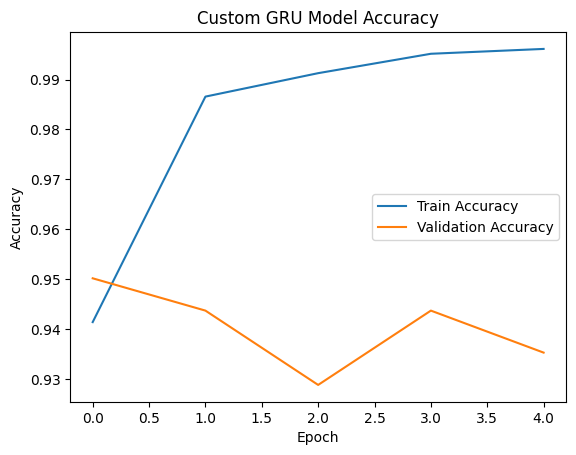

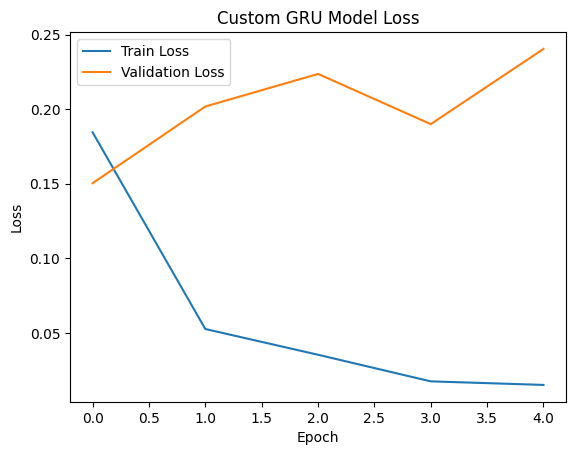

In [ ]:
#@title 9.6 Plotting Training
# Plotting model accuracy
plt.plot(history_custom_gru.history['accuracy'], label='Train Accuracy')
plt.plot(history_custom_gru.history['val_accuracy'], label='Validation Accuracy')

plt.title('Custom GRU Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting model loss
plt.plot(history_custom_gru.history['loss'], label='Train Loss')
plt.plot(history_custom_gru.history['val_loss'], label='Validation Loss')

plt.title('Custom GRU Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

9.6 Plotting Training

Plotting Model Accuracy:

The training and validation accuracies over epochs are plotted.
The accuracy and val_accuracy values from the history_custom_gru object are used.
The plot provides insights into how the accuracy of the model changes over training epochs.

Plotting Model Loss:

The training and validation losses over epochs are plotted.
The loss and val_loss values from the history_custom_gru object are used.
The plot helps in understanding how the loss of the model evolves during training, indicating whether the model is learning effectively.
These plots offer valuable information about the training dynamics of the GRU model, enabling assessment of its performance and convergence behavior.

### 10: Plotting for Comparisons

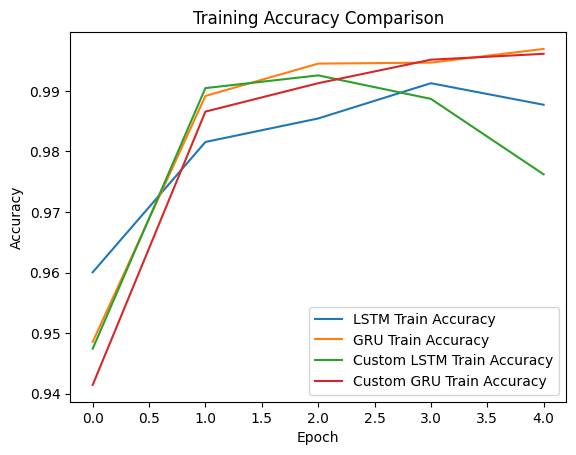

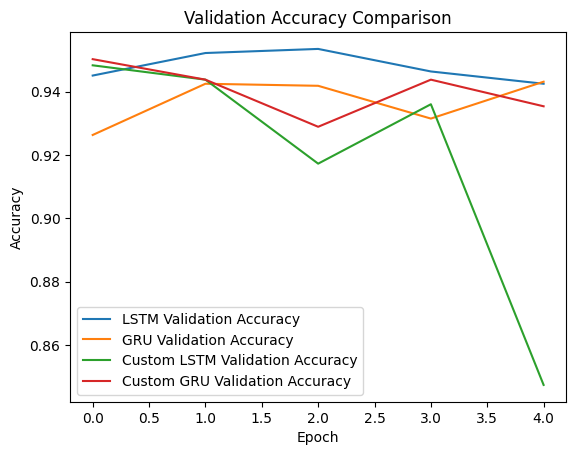

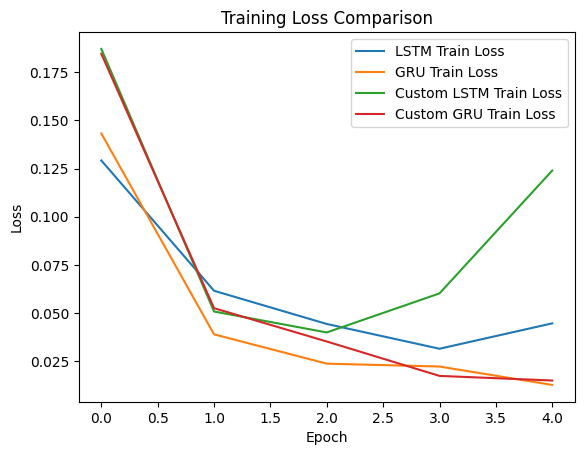

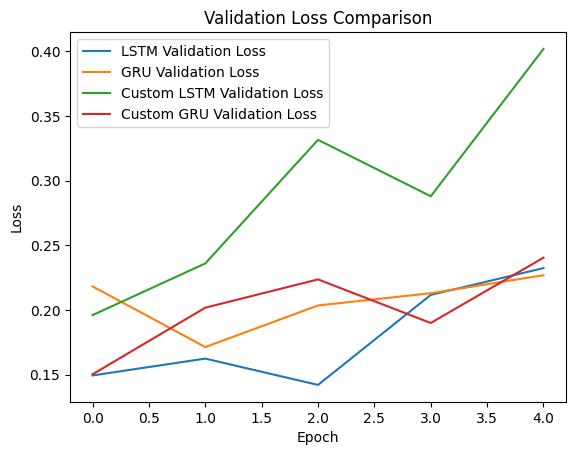

In [ ]:
#@title 10.1 Plotting training accuracy
plt.plot(history_model_2.history['accuracy'], label='LSTM Train Accuracy')
plt.plot(history_gru.history['accuracy'], label='GRU Train Accuracy')
plt.plot(history.history['accuracy'], label='Custom LSTM Train Accuracy')
plt.plot(history_custom_gru.history['accuracy'], label='Custom GRU Train Accuracy')

plt.title('Training Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting validation accuracy
plt.plot(history_model_2.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='GRU Validation Accuracy')
plt.plot(history.history['val_accuracy'], label='Custom LSTM Validation Accuracy')
plt.plot(history_custom_gru.history['val_accuracy'], label='Custom GRU Validation Accuracy')

plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training loss
plt.plot(history_model_2.history['loss'], label='LSTM Train Loss')
plt.plot(history_gru.history['loss'], label='GRU Train Loss')
plt.plot(history.history['loss'], label='Custom LSTM Train Loss')
plt.plot(history_custom_gru.history['loss'], label='Custom GRU Train Loss')

plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting validation loss
plt.plot(history_model_2.history['val_loss'], label='LSTM Validation Loss')
plt.plot(history_gru.history['val_loss'], label='GRU Validation Loss')
plt.plot(history.history['val_loss'], label='Custom LSTM Validation Loss')
plt.plot(history_custom_gru.history['val_loss'], label='Custom GRU Validation Loss')

plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


10: Plotting for Comparisons

**Plotting Model Accuracy:**

Here, we visualize the training and validation accuracy of three different models: LSTM, GRU, Custom LSTM and Custom GRU. The training accuracy represents how well the models perform on the training data during the training process, while the validation accuracy indicates their performance on unseen validation data. The purpose of plotting these accuracies is to assess how well each model is learning from the data and whether they are overfitting or underfitting.

**Training Accuracy:**
- LSTM Training Accuracy: Accuracy of the LSTM model on the training data.
- GRU Training Accuracy: Accuracy of the GRU model on the training data.
- Custom LSTM Training Accuracy: Accuracy of the Custom LSTM model on the training data.
- Custom GRU Training Accuracy: Accuracy of the Custom GRU model on the training data.

**Validation Accuracy:**
- LSTM Validation Accuracy: Accuracy of the LSTM model on the validation data.
- GRU Validation Accuracy: Accuracy of the GRU model on the validation data.
- Custom LSTM Validation Accuracy: Accuracy of the Custom LSTM model on the validation data.
- Custom GRU Validation Accuracy: Accuracy of the Custom GRU model on the validation data.

**Plotting Model Loss:**

Similar to accuracy, this section visualizes the training and validation loss of the three models: LSTM, GRU, Custom LSTM and Custom GRU. Loss represents the error between the actual and predicted values. Lower loss values indicate better performance. By plotting these losses, we can monitor how well each model is learning and whether they are overfitting or underfitting.

**Training Loss:**
- LSTM Training Loss: Loss of the LSTM model on the training data.
- GRU Training Loss: Loss of the GRU model on the training data.
- Custom LSTM Training Loss: Loss of the Custom LSTM model on the training data.
- Custom GRU Training Loss: Loss of the Custom GRU model on the training data.

**Validation Loss:**
- LSTM Validation Loss: Loss of the LSTM model on the validation data.
- GRU Validation Loss: Loss of the GRU model on the validation data.
- Custom LSTM Validation Loss: Loss of the Custom LSTM model on the validation data.
- Custom GRU Validation Loss: Loss of the Custom GRU model on the validation data.

49/49 [==============================] - 1s 11ms/step


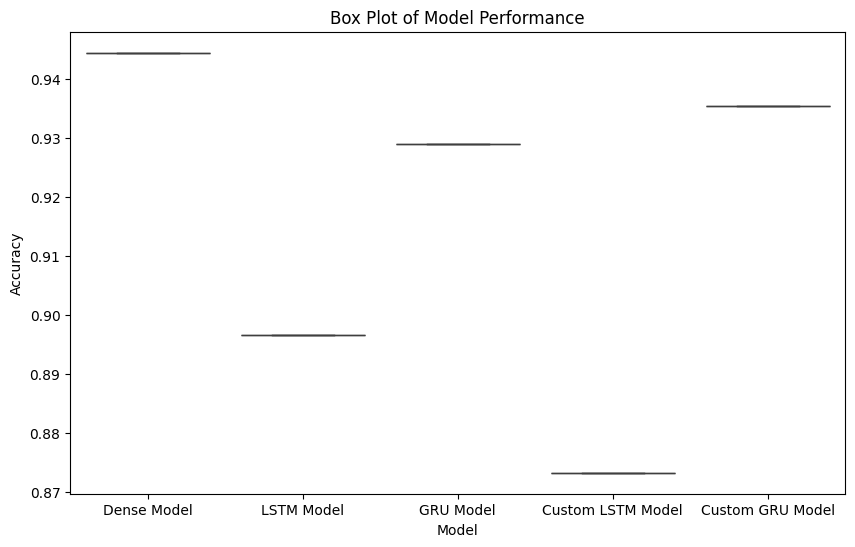

In [ ]:
#@title 10.2 Box plot of model performance
model_names = ['Dense Model', 'LSTM Model', 'GRU Model', 'Custom LSTM Model', 'Custom GRU Model']
accuracies = [accuracy_score(Y_test, (model_1.predict(X_test) >= 0.5).astype(int)),
              accuracy_score(Y_test, (model_2.predict(X_test) >= 0.5).astype(int)),
              accuracy_score(Y_test, (model_gru.predict(X_test) >= 0.5).astype(int)),
              accuracy_score(Y_test, (model_custom_lstm.predict(X_test_tokenized) >= 0.5).astype(int)),
              accuracy_score(Y_test, (model_custom_gru.predict(X_test_tokenized_gru) >= 0.5).astype(int))]

plt.figure(figsize=(10, 6))
sns.boxplot(x=model_names, y=accuracies)
plt.title('Box Plot of Model Performance')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

Box plot of model performance

The box plot of model performance compares the accuracy scores of five different models: Dense Model, LSTM Model, GRU Model, Custom LSTM Model, and Custom GRU Model. It visualizes the spread and distribution of accuracy scores across these models, facilitating a comparative analysis of their performance on the test dataset. This graphical summary helps identify potential variations, outliers, and trends in model performance.

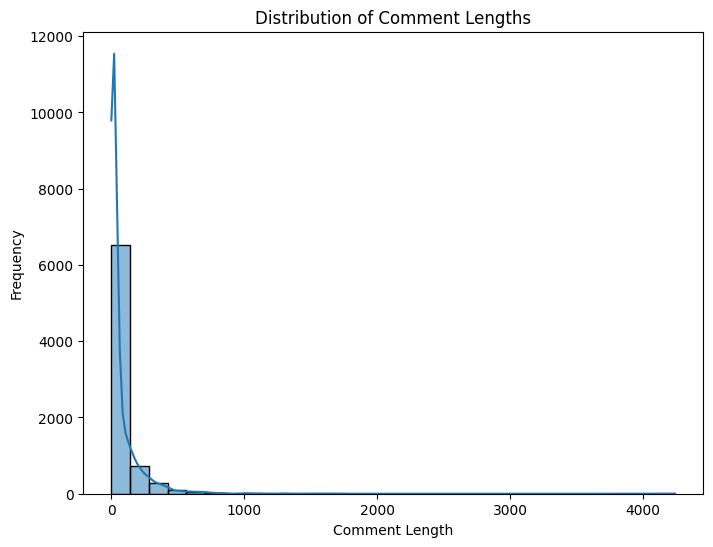

In [ ]:
#@title 10.3 Feature Distribution Plot : comment lengths
comment_lengths = [len(comment.split()) for comment in data['clean_text']]
plt.figure(figsize=(8, 6))
sns.histplot(comment_lengths, bins=30, kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()

Feature Distribution Plots

Since feature distribution plots depend on the specific features you're interested in, you need to specify which features you want to visualize. For example, if you want to visualize the distribution of comment lengths in your dataset:

49/49 [==============================] - 1s 12ms/step


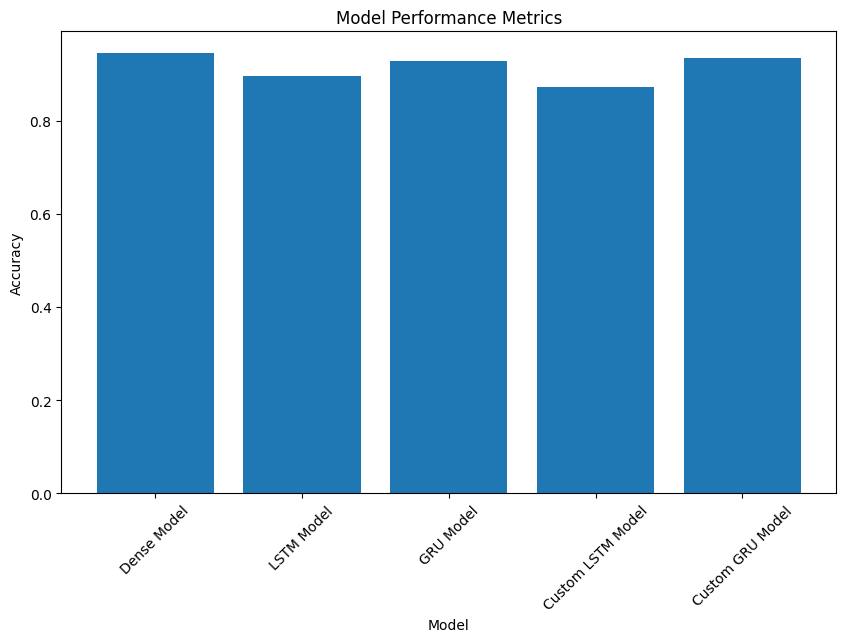

In [ ]:
#@title 10.4 Model performance metrics bar plot
models = ['Dense Model', 'LSTM Model', 'GRU Model', 'Custom LSTM Model', 'Custom GRU Model']
accuracy_scores = [accuracy_score(Y_test, (model_1.predict(X_test) >= 0.5).astype(int)),
                   accuracy_score(Y_test, (model_2.predict(X_test) >= 0.5).astype(int)),
                   accuracy_score(Y_test, (model_gru.predict(X_test) >= 0.5).astype(int)),
                   accuracy_score(Y_test, (model_custom_lstm.predict(X_test_tokenized) >= 0.5).astype(int)),
                   accuracy_score(Y_test, (model_custom_gru.predict(X_test_tokenized_gru) >= 0.5).astype(int))]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores)
plt.title('Model Performance Metrics')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

Model performance metrics bar plot

The provided code snippet creates a bar plot to visualize the accuracy scores of different models. This visualization aids in comparing the performance of the models based on their accuracy.


49/49 [==============================] - 0s 8ms/step


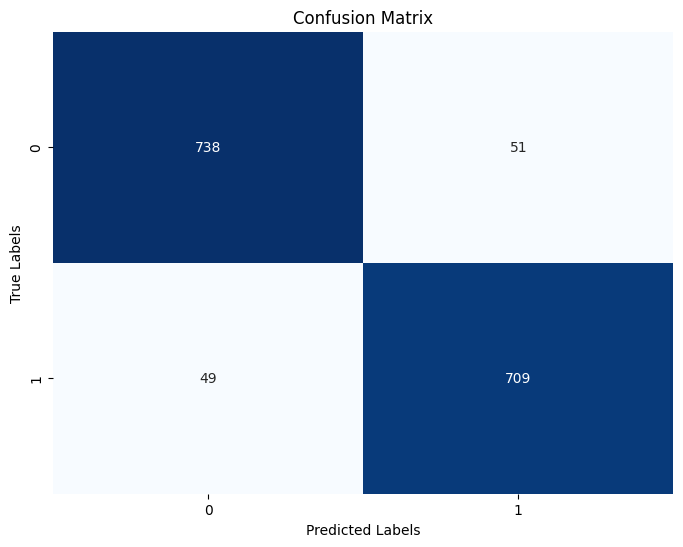

In [ ]:
#@title 10.5 Confusion Matrix
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))
cm = confusion_matrix(Y_test, model_custom_gru.predict(X_test_tokenized_gru) >= 0.5)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Confusion Matrix

The confusion matrix provides a tabular representation of the true and predicted classifications by a machine learning model. Heatmap visualization enhances its interpretability by using color gradients to represent the frequency of correct and incorrect predictions across different classes. Matplotlib allows customization of the plot's appearance, aiding in the presentation of the confusion matrix heatmap.